In [1]:

import utils
%matplotlib inline

In [2]:
TrafSum = utils.pandas.read_hdf(
            utils.path('','traffic_summary.h5'),
       key='table')
TrafSum.head()

,lat,lng,county_fips,population,population_proper,density,incorporated,traff_pickup_latitude,traff_pickup_longitude,traff_traffic_count,traff_traffic,traff_Dist
0,40.5834,-74.1496,36085,476015.0,476015.0,3155.0,True,40.6,-74.1,2708,0.000084,0.052304
1,40.5876,-73.7092,36059,0.0,0.0,1485.4,False,40.6,-73.7,1209,0.000037,0.015440
2,40.5887,-73.6660,36059,33750.0,33750.0,5883.0,True,40.6,-73.7,1209,0.000037,0.035829
3,40.5894,-73.7296,36059,1922.0,1922.0,1691.0,True,40.6,-73.7,1209,0.000037,0.031441
4,40.5903,-73.5795,36059,0.0,0.0,796.9,False,40.6,-73.6,380,0.000012,0.022679


In [3]:
Train                             = utils.pandas.concat(
    map(
    
        lambda name               : utils.FeatureEngineerer(name).Process(TrafSum),
        utils.H5('train')[:2] )
)

Lanched Process
Loading DF./data/train/55.h5
Taskname : Loading DF./data/train/55.h5 :
		took me 0:00:00.856551 seconds
Matching Pop
Taskname : Matching Pop :
		took me 0:01:19.538942 seconds
Taskname : Lanched Process :
		took me 0:01:20.448357 seconds


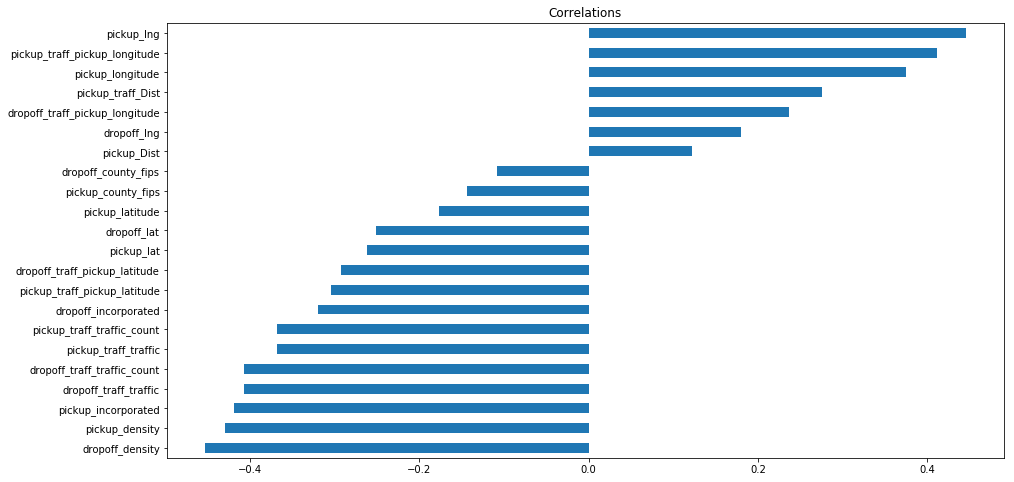

In [12]:
objs = Train.corr().fare_amount.sort_values().drop('fare_amount')


objs[objs.abs().values>0.1].plot(kind='barh',figsize=(15,8),title='Correlations')